In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from joblib import dump

In [110]:
data = pd.read_csv('clean.csv')
label_encoder_dict = {}

for col in ['CarName', 'EngineType', 'FuelType', 'Drivetrain']:
    label_encoder = LabelEncoder()
    data[col] = label_encoder.fit_transform(data[col])
    label_encoder_dict[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

X = data.drop('TopSpeed', axis=1)
y = data['TopSpeed']

data

,CarName,EngineType,FuelType,MaximumPower,MaximumTorque,Drivetrain,FuelConsumption,Range,FuelTankCapacity,CO2Emissions,TopSpeed,Acceleration
0,13247,4,0,90,215,1,4.5,1111,50.0,120,182,11.5
1,17426,3,4,69,112,1,6.0,750,45.0,144,170,14.2
2,10239,9,4,231,300,2,9.7,721,70.0,231,250,6.3
3,21038,4,4,116,155,1,7.2,763,55.0,173,189,11.8
4,9803,4,4,163,240,2,8.3,746,62.0,198,230,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...
25277,11706,4,0,120,280,1,7.1,732,52.0,189,190,10.8
25278,19155,4,4,200,262,1,9.4,553,52.0,226,230,8.4
25279,11700,4,0,110,260,1,4.5,1155,52.0,119,188,12.3
25280,20137,4,4,200,250,2,8.5,423,36.0,202,243,4.9


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

Точность модели на тестовом наборе данных: 87.43634121194086 %
Точность модели на обучающем данных: 87.44842566730911 %
Среднеквадратичная ошибка (MSE): 71.20489778431056
Коэффициент детерминации (R^2): 0.8743634121194086
Средняя абсолютная ошибка (MAE): 6.41225421179865


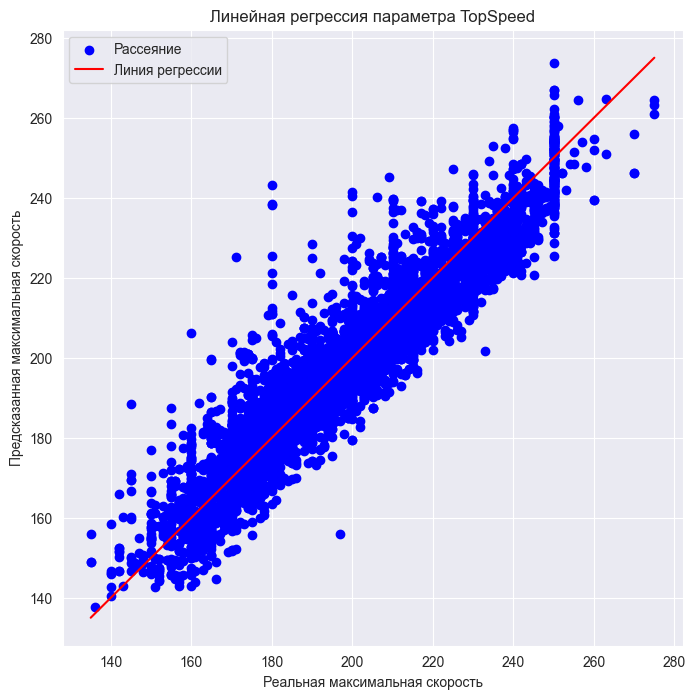

In [112]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test) * 100
print('Точность модели на тестовом наборе данных:', accuracy, '%')

accuracy2 = model.score(X_train, y_train) * 100
print('Точность модели на обучающем данных:', accuracy2, '%')

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse}")
print(f"Коэффициент детерминации (R^2): {r2}")
print(f"Средняя абсолютная ошибка (MAE): {mae}")

from matplotlib import pyplot as plt

plt.figure(figsize=(8, 8))

plt.scatter(y_test, y_pred, color='blue', label='Рассеяние')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Линия регрессии')
plt.xlabel('Реальная максимальная скорость')
plt.ylabel('Предсказанная максимальная скорость')
plt.title('Линейная регрессия параметра TopSpeed')
plt.legend()
plt.show()

In [113]:
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso_model = Lasso()

param_grid = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(lasso_model, param_grid, scoring=make_scorer(r2_score), cv=5)

grid_search.fit(X_train, y_train)

accuracy = model.score(X_test, y_test) * 100
print('Точность модели на тестовом наборе данных:', accuracy, '%')

accuracy2 = model.score(X_train, y_train) * 100
print('Точность модели на обучающем данных:', accuracy2, '%')

# Оптимальные параметры модели
best_params = grid_search.best_params_

print("Лучшие параметры:", best_params)

lasso_model_best = Lasso(alpha=best_params['alpha'])
lasso_model_best.fit(X_train, y_train)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse}")
print(f"Коэффициент детерминации (R^2): {r2}")
print(f"Средняя абсолютная ошибка (MAE): {mae}")

y_pred = lasso_model_best.predict(X_test)

Точность модели на тестовом наборе данных: 87.43634121194086 %
Точность модели на обучающем данных: 87.44842566730911 %
Лучшие параметры: {'alpha': 0.001}
Среднеквадратичная ошибка (MSE): 71.20489778431056
Коэффициент детерминации (R^2): 0.8743634121194086
Средняя абсолютная ошибка (MAE): 6.41225421179865


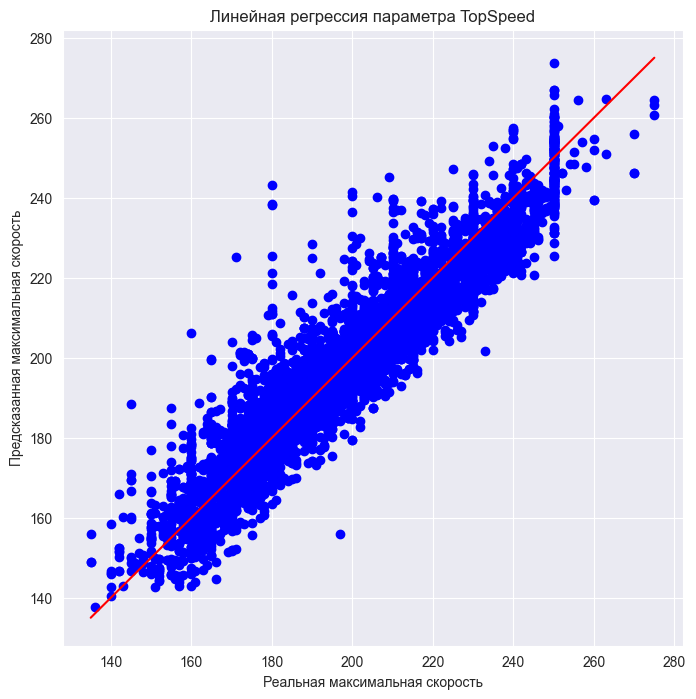

In [116]:
plt.figure(figsize=(8, 8))

y_test_actual = y_test
y_test_predicted = lasso_model_best.predict(X_test)

plt.scatter(y_test_actual, y_test_predicted, color='b')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Линия регрессии')

plt.xlabel('Реальная максимальная скорость')
plt.ylabel('Предсказанная максимальная скорость')
plt.title('Линейная регрессия параметра TopSpeed')

# Отображение графика
plt.show()

Точность модели на тестовом наборе данных: 87.43681536963264 %
Точность модели на обучающем данных: 87.44841767959038 %
Лучшие параметры: {'alpha': 10}
Среднеквадратичная ошибка (MSE): 71.20221048194536
Коэффициент детерминации (R^2): 0.8743681536963264
Средняя абсолютная ошибка (MAE): 6.412155266030508


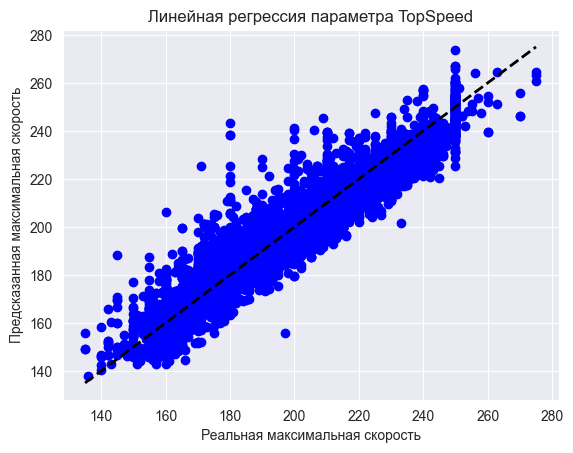

In [117]:
from sklearn.linear_model import Ridge
model = Ridge()
parameters = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model, parameters, cv=5)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

accuracy = best_model.score(X_test, y_test) * 100
print('Точность модели на тестовом наборе данных:', accuracy, '%')

accuracy2 = best_model.score(X_train, y_train) * 100
print('Точность модели на обучающем данных:', accuracy2, '%')

print("Лучшие параметры:", best_params)

y_pred_ridge = best_model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)

print(f"Среднеквадратичная ошибка (MSE): {mse}")
print(f"Коэффициент детерминации (R^2): {r2}")
print(f"Средняя абсолютная ошибка (MAE): {mae}")

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, color='blue')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel('Реальная максимальная скорость')
ax.set_ylabel('Предсказанная максимальная скорость')
ax.set_title('Линейная регрессия параметра TopSpeed')
plt.show()